In [38]:
# regression : 회귀
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
#url=
#df = pd.read_csv(url, header=None)
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 데이터 살펴보기
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [39]:
# hosrsepower 결측치 nan으로 변경
df.horsepower = pd.to_numeric(df.horsepower, errors='coerce')
# 평균값으로 대처
df.fillna(df.horsepower.mean(), inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [41]:
# mpg와 선형성이 있는 컬럼들을 확인
# 상관계수, 시각화(산점도 scatterplot), regplot 으로 확인
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


<Axes: xlabel='mpg', ylabel='displacement'>

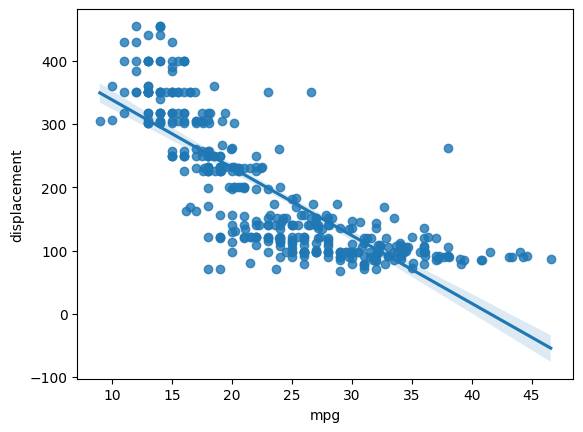

In [42]:
# sns.scatterplot(data=df, x='mpg', y='displacement')
sns.regplot(data=df, x='mpg', y='displacement')

In [ ]:

# 학습용과 테으스트용 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['displacement', 'weight']],  #독립 변수 여러개 기재, 각각 결정계수 확인 가능(하기셀)
                                                    df.mpg,               #종속 변수
                                                    test_size=0.2,   #검증 20%
                                                    random_state=45) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))
print('total data 개수: ', len(X))

train data 개수:  318
test data 개수:  80
total data 개수:  398


In [44]:
'''
Step 5: 단순회귀분석 모델 - sklearn 사용
sklearn 계열의 데이터는 항상 2차원을 요구. demension 2
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모델 객체 생성
lr = LinearRegression()   

# train data를 가지고 모델 학습 : fit 학습시키고 적용
lr.fit(X_train[['displacement']], y_train)

# 학습을 마친 모델에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test[['displacement']], y_test)    
print('R^2 결정계수: ', r_square)   #결정계수 1이되면 완벽 (0과1사이 결정계수 값을 알려줌.)

R^2 결정계수:  0.6540122078670478


In [45]:
'''
Step 5: 단순회귀분석 모델 - sklearn 사용
sklearn 계열의 데이터는 항상 2차원을 요구. demension 2
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모델 객체 생성
lr = LinearRegression()   

# train data를 가지고 모델 학습 : fit 학습시키고 적용
lr.fit(X_train[['weight']], y_train)

# 학습을 마친 모델에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test[['weight']], y_test)    
print('R^2 결정계수: ', r_square)   #결정계수 1이되면 완벽 (0과1사이 결정계수 값을 알려줌.)

R^2 결정계수:  0.6650258658981525


In [ ]:
# 데이터 정규화 또는 스케일링, 이상치 여부 확인하고 제거
# 정규화 : Min-Max Scaling 데이터를 0~1사이의 값으로 압축
# 표준화 : StandardScaler : 데이터를 평균 0 표준편차 1
# 이상치 제거
# 구간화 : 범주형 데이터로 변환

In [49]:
from sklearn.preprocessing import StandardScaler
sds = StandardScaler()
scaled_weight = sds.fit_transform(df[['weight']])
print(scaled_weight[:2])
x_train, x_test, y_train, y_test = train_test_split(scaled_weight, df.mpg, test_size=0.2, random_state=100)
len(x_train), len(y_train)

[[0.63086987]
 [0.85433297]]


(318, 318)

In [50]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모델 객체 생성
lr = LinearRegression()   

# train data를 가지고 모델 학습 : fit 학습시키고 적용
lr.fit(x_train, y_train)

# 학습을 마친 모델에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(x_test, y_test)    
print('R^2 결정계수: ', r_square)   #결정계수 1이되면 완벽 (0과1사이 결정계수 값을 알려줌.)

R^2 결정계수:  0.7373187848306613


In [46]:
from sklearn.preprocessing import StandardScaler
sds = StandardScaler()
x_scaled_train = sds.fit_transform(X_train[['weight']])
x_scaled_test = sds.transform(X_test[['weight']])
len(x_scaled_train),len(x_scaled_test)

(318, 80)

In [47]:
# sklearn 계열의 데이터는 항상 2차원을 요구  demesion 2  
# 학습 선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  # 모델생성
lr.fit(x_scaled_train, y_train)  #모델을 학습용 데이터로 학습
# 결정계수
lr.score(x_scaled_test, y_test)

0.6650258658981526

[45] 셀과 [47] 셀의 결정계수 값이 거의 동일함.
비교수치가 하나라서..?? 결정계수 값이 스케일링을 하더라도 동일하다. 
여러가지 일 때 스케일링 해야지 차이가 있음.??